In [ ]:
#해당 파일은 2024 빅콘 스마트팜 참외 생산량 예측 모델 프로젝트 중 본인이 수행했던 데이터 정리 코드만 발췌한 파일입니다. 


1. 데이터셋 지정

In [2]:
import random
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
f1 = "C:\\Users\\kjhoe\\OneDrive\\바탕화~1-LAPTOP-VGOF9FJ7-25904429\\대외활동\\공모전\\2024 빅콘\\개체번호, 연도 통합.xlsx"
df= pd.read_excel(f1, sheet_name='combined')
df_1 = pd.read_excel(f1, sheet_name='combined')
df_2 = pd.read_excel(f1, sheet_name='combined')
df_3 = pd.read_excel(f1, sheet_name='combined')
df_4 = pd.read_excel(f1, sheet_name='combined')
df_5 = pd.read_excel(f1, sheet_name='combined')
df_6 = pd.read_excel(f1, sheet_name='combined')
df_7 = pd.read_excel(f1, sheet_name='combined')
df_8 = pd.read_excel(f1, sheet_name='combined')
df_9 = pd.read_excel(f1, sheet_name='combined')
df_10 = pd.read_excel(f1, sheet_name='combined')
df_11 = pd.read_excel(f1, sheet_name='combined')
df_12 = pd.read_excel(f1, sheet_name='combined')
df_13 = pd.read_excel(f1, sheet_name='combined')

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

1.1 결측값 확인

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MSRM_DT          17544 non-null  datetime64[ns]
 1   AREA_TPRT        17539 non-null  float64       
 2   AREA_HMDT        17517 non-null  float64       
 3   AREA_WDSP        17544 non-null  float64       
 4   INNER_TPRT       10100 non-null  float64       
 5   INNER_HMDT       9615 non-null   float64       
 6   INNER_CBDX_CTRN  7528 non-null   float64       
 7   EXTN_TPRT        0 non-null      float64       
 8   PLT_LNGTH        120 non-null    float64       
 9   LEAF_LNGTH       1488 non-null   float64       
 10  LEAF_WDTH        1488 non-null   float64       
 11  STEM_THNS        1488 non-null   float64       
 12  SHPMN_QTY        2640 non-null   float64       
 13  SHPMN_AMT        2640 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memo

In [6]:
df_1.isna().sum()

MSRM_DT                0
AREA_TPRT              5
AREA_HMDT             27
AREA_WDSP              0
INNER_TPRT          7444
INNER_HMDT          7929
INNER_CBDX_CTRN    10016
EXTN_TPRT          17544
PLT_LNGTH          17424
LEAF_LNGTH         16056
LEAF_WDTH          16056
STEM_THNS          16056
SHPMN_QTY          14904
SHPMN_AMT          14904
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# 날짜 컬럼을 datetime 형식으로 변환
df_1['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df_1['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')
df_2['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df_2['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')
df_3['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df_3['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')
df_4['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df_4['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')
df_5['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df_5['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')
df_6['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df_6['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')
df_7['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df_7['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')
df_8['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df_8['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')
df_9['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df_9['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')
df_10['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df_10['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')
df_11['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df_11['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')


In [9]:
# 각 컬럼의 결측치 비율 확인
missing_values = df.isnull().sum() / len(df) * 100
print("결측치 비율:\n", missing_values)


결측치 비율:
 MSRM_DT              0.000000
AREA_TPRT            0.028500
AREA_HMDT            0.153899
AREA_WDSP            0.000000
INNER_TPRT          42.430461
INNER_HMDT          45.194938
INNER_CBDX_CTRN     57.090743
EXTN_TPRT          100.000000
PLT_LNGTH           99.316005
LEAF_LNGTH          91.518468
LEAF_WDTH           91.518468
STEM_THNS           91.518468
SHPMN_QTY           84.952120
SHPMN_AMT           84.952120
dtype: float64


<Figure size 4000x3000 with 0 Axes>

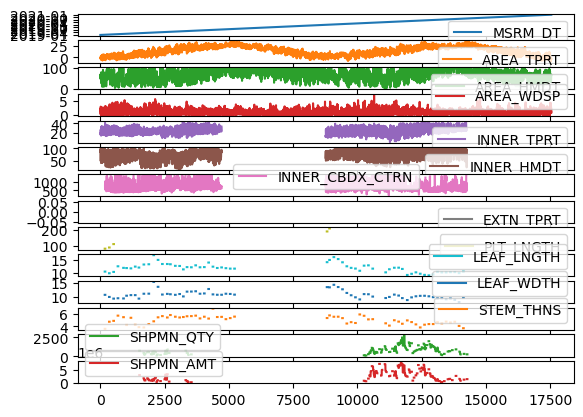

In [10]:
# 결측치 시각화
plt.figure(figsize=(40, 30))
df.plot(subplots=True)
plt.show()

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

1.2 결측값 채우기- 지역환경, 내부환경 변수

In [14]:
#1.2.1 ARIMA 사용

In [15]:
#ARIMA

In [16]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# 결측치를 채우는 함수 (ARIMA 사용)
def fill_missing_with_arima(series, X, order=(5, 1, 0)):
    # X에서 결측값이 없는 행만 추출
    non_null_indices = X.dropna().index
    series_non_null = series.loc[non_null_indices]

    # 훈련 데이터와 테스트 데이터 분할
    train_size = int(len(series_non_null) * 0.8)
    train, test = series_non_null[:train_size], series_non_null[train_size:]

    # ARIMA 모델 적용
    model = ARIMA(train, order=order)
    fit_model = model.fit()

    # 모델을 이용해 테스트 데이터 예측
    predictions = fit_model.predict(start=train_size, end=len(series_non_null)-1, dynamic=False)

    # MSE 및 RMSE 평가
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)

    print(f'Performance for {series.name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}\n')

    # 예측된 값을 사용하여 결측값만 채우기
    filled_series = series.copy()
    filled_series.loc[series.isnull()] = fit_model.predict(start=0, end=len(series)-1, dynamic=False)[series.isnull()]

    return filled_series

# 환경 변수 리스트
env_vars = ['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']

# 각 변수의 결측치를 ARIMA 모델로 채움 및 성능 평가
for var in env_vars:
    df[var] = fill_missing_with_arima(df[var], df[['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']])

# 결과 확인
print(df[env_vars].head())


c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results 

Performance for AREA_TPRT:
Mean Squared Error: 12.045336693184339
Root Mean Squared Error: 3.470639234087049



c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results 

Performance for AREA_HMDT:
Mean Squared Error: 261.30809690794507
Root Mean Squared Error: 16.165026968982918



c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results 

Performance for INNER_TPRT:
Mean Squared Error: 35.01255959971292
Root Mean Squared Error: 5.917141167803327



c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results 

Performance for INNER_HMDT:
Mean Squared Error: 522.7832179677307
Root Mean Squared Error: 22.864453152606355



c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results 

Performance for INNER_CBDX_CTRN:
Mean Squared Error: 60415.96049767094
Root Mean Squared Error: 245.79658357607605

   AREA_TPRT  AREA_HMDT  INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN
0       -1.9       50.0        19.1        87.0         0.000000
1       -3.2       54.0        18.8        87.0       767.366314
2       -2.5       62.0        18.5        87.0       577.774520
3       -2.5       62.0        18.1        87.0      1064.589829
4       -3.6       67.0        17.8        88.0       799.506240


1.2.2 SARIMA 사용

In [17]:
#SARIMA (계절성 반영)

In [18]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np


# SARIMA를 사용하여 결측치를 채우는 함수
def fill_missing_with_sarima(series, X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)):
    # X에서 결측값이 없는 행만 추출
    non_null_indices = X.dropna().index
    series_non_null = series.loc[non_null_indices]

    # 훈련 데이터와 테스트 데이터 분할
    train_size = int(len(series_non_null) * 0.8)
    train, test = series_non_null[:train_size], series_non_null[train_size:]

    # SARIMA 모델 적용
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    fit_model = model.fit(disp=False)

    # 모델을 이용해 테스트 데이터 예측
    predictions = fit_model.predict(start=train_size, end=len(series_non_null)-1, dynamic=False)

    # MSE 및 RMSE 평가
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)

    print(f'Performance for {series.name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}\n')

    # 예측된 값을 사용하여 결측값만 채우기
    filled_series = series.copy()
    filled_series.loc[series.isnull()] = fit_model.predict(start=0, end=len(series)-1, dynamic=False)[series.isnull()]

    return filled_series

In [19]:

# 환경 변수 리스트
env_vars = ['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']

# 각 변수의 결측치를 SARIMA 모델로 채움 및 성능 평가
for var in env_vars:
    df_1[var] = fill_missing_with_sarima(df_1[var], df_1[['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']])

# 결과 확인
print(df_1[env_vars].head())

c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performance for AREA_TPRT:
Mean Squared Error: 14.449471972455292
Root Mean Squared Error: 3.8012461078513837



c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performance for AREA_HMDT:
Mean Squared Error: 717.6348039915832
Root Mean Squared Error: 26.788706650220785



c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performance for INNER_TPRT:
Mean Squared Error: 30.575687834422084
Root Mean Squared Error: 5.529528717207469



c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performance for INNER_HMDT:
Mean Squared Error: 253.65799907254245
Root Mean Squared Error: 15.926644312991437



c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performance for INNER_CBDX_CTRN:
Mean Squared Error: 37632.24292327412
Root Mean Squared Error: 193.99031657089



c:\Users\kjhoe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


   AREA_TPRT  AREA_HMDT  INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN
0       -1.9       50.0        19.1        87.0         0.000000
1       -3.2       54.0        18.8        87.0       765.002423
2       -2.5       62.0        18.5        87.0       600.996654
3       -2.5       62.0        18.1        87.0       985.005595
4       -3.6       67.0        17.8        88.0       867.993904


1.2.3 Prophet 사용

In [20]:
#Prophet 

In [21]:
#prophet은 conda로 설치해야 한다고 함
#Window Anaconda Prompt 검색해서 프롬프트 창에서 설치

In [22]:
print(df_3.head())

              MSRM_DT  AREA_TPRT  AREA_HMDT  AREA_WDSP  INNER_TPRT  \
0 2019-01-01 00:00:00       -1.9       50.0        1.6        19.1   
1 2019-01-01 01:00:00       -3.2       54.0        1.7        18.8   
2 2019-01-01 02:00:00       -2.5       62.0        2.1        18.5   
3 2019-01-01 03:00:00       -2.5       62.0        1.6        18.1   
4 2019-01-01 04:00:00       -3.6       67.0        0.8        17.8   

   INNER_HMDT  INNER_CBDX_CTRN  EXTN_TPRT  PLT_LNGTH  LEAF_LNGTH  LEAF_WDTH  \
0        87.0              NaN        NaN        NaN         NaN        NaN   
1        87.0              NaN        NaN        NaN         NaN        NaN   
2        87.0              NaN        NaN        NaN         NaN        NaN   
3        87.0              NaN        NaN        NaN         NaN        NaN   
4        88.0              NaN        NaN        NaN         NaN        NaN   

   STEM_THNS  SHPMN_QTY  SHPMN_AMT  
0        NaN        NaN        NaN  
1        NaN        NaN       

1.2.3.(1) 시간 변수만 사용해서 다섯개 한번에 예측

In [23]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prophet을 사용하여 결측값을 채우는 함수
def fill_missing_with_prophet(series):
    # 시리즈 데이터에서 결측값이 없는 부분만 Prophet 모델에 사용
    series_non_null = series.dropna()
    
    # 데이터 준비: Prophet에 맞는 형식으로 변환
    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(series_non_null.index),  # 시간 데이터를 datetime 형식으로 변환
        'y': series_non_null.values   # 관측값 (series)
    })
    
    # Prophet 모델 초기화
    model = Prophet(daily_seasonality=5, yearly_seasonality=20, weekly_seasonality=10)
    
    # 모델 학습
    model.fit(df_prophet)
    
    # 전체 기간에 대해 예측 (datetime 형식으로 변환하여 Prophet에 전달)
    future = pd.DataFrame({'ds': pd.to_datetime(series.index)})  # 결측값 포함한 전체 데이터의 시간 정보
    forecast = model.predict(future)
    
    # 예측 결과에서 'yhat' 값 사용
    predicted_values = forecast['yhat'].values
    
    # 결측값을 예측값으로 채우기
    filled_series = series.copy()
    filled_series[series.isnull()] = predicted_values[series.isnull()]
    
    return filled_series, predicted_values

# 성능 평가 함수 (MSE, RMSE, MAE 계산)
def evaluate_performance(original_series, predicted_values):
    # 결측값이 아닌 부분에 대해 평가
    mask = original_series.notnull()
    
    mse = mean_squared_error(original_series[mask], predicted_values[mask])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_series[mask], predicted_values[mask])
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 환경 변수 리스트 (사용자가 제공한 변수)
env_vars = ['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']

# 각 변수의 결측치를 Prophet 모델로 채움 및 성능 평가
for var in env_vars:
    print(f"Evaluating performance for {var}...")
    
    # 결측값을 Prophet으로 채우고, 예측된 전체 값을 반환
    df_3[var], predicted_values = fill_missing_with_prophet(df[var])
    
    # 성능 평가
    evaluate_performance(df[var], predicted_values)

# 결과 확인
print(df_3[env_vars].head())


Evaluating performance for AREA_TPRT...


16:35:51 - cmdstanpy - INFO - Chain [1] start processing
16:36:21 - cmdstanpy - INFO - Chain [1] done processing


MSE: 18.484572033319242
RMSE: 4.299368794755718
MAE: 3.498361133751842
Evaluating performance for AREA_HMDT...


16:36:30 - cmdstanpy - INFO - Chain [1] start processing
16:36:47 - cmdstanpy - INFO - Chain [1] done processing


MSE: 465.3068631489933
RMSE: 21.57097269825803
MAE: 17.9515380640037
Evaluating performance for INNER_TPRT...


16:36:56 - cmdstanpy - INFO - Chain [1] start processing
16:37:21 - cmdstanpy - INFO - Chain [1] done processing


MSE: 27.5770540025956
RMSE: 5.25138591255638
MAE: 3.5710752298136827
Evaluating performance for INNER_HMDT...


16:37:30 - cmdstanpy - INFO - Chain [1] start processing
16:37:50 - cmdstanpy - INFO - Chain [1] done processing


MSE: 193.3568412172149
RMSE: 13.905281054952285
MAE: 10.045988697108402
Evaluating performance for INNER_CBDX_CTRN...


16:37:58 - cmdstanpy - INFO - Chain [1] start processing
16:38:20 - cmdstanpy - INFO - Chain [1] done processing


MSE: 37688.039665229364
RMSE: 194.1340765173115
MAE: 129.97772567116198
   AREA_TPRT  AREA_HMDT  INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN
0       -1.9       50.0        19.1        87.0         0.000000
1       -3.2       54.0        18.8        87.0       767.366314
2       -2.5       62.0        18.5        87.0       577.774520
3       -2.5       62.0        18.1        87.0      1064.589829
4       -3.6       67.0        17.8        88.0       799.506240


In [24]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MSRM_DT          17544 non-null  datetime64[ns]
 1   AREA_TPRT        17544 non-null  float64       
 2   AREA_HMDT        17544 non-null  float64       
 3   AREA_WDSP        17544 non-null  float64       
 4   INNER_TPRT       17544 non-null  float64       
 5   INNER_HMDT       17544 non-null  float64       
 6   INNER_CBDX_CTRN  17544 non-null  float64       
 7   EXTN_TPRT        0 non-null      float64       
 8   PLT_LNGTH        120 non-null    float64       
 9   LEAF_LNGTH       1488 non-null   float64       
 10  LEAF_WDTH        1488 non-null   float64       
 11  STEM_THNS        1488 non-null   float64       
 12  SHPMN_QTY        2640 non-null   float64       
 13  SHPMN_AMT        2640 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memo

1.2.3.(2) 다른 변수 동시에 고려해서 반응변수 하나씩 예측

In [25]:
#prophet으로 변수 하나씩 예측해봄
#우선 지역 온도의 결측값이 가장 적으니까 위에 있는 prophet에 결측값 없는 지역바람 추가해서 채움
#채워진 지역온도랑 지역바람을 가지고 prophet에 regression 변수 추가해서 지역습도 예측. 
#지역온도, 지역습도, 지역바람으로 내부온도
#지역온도, 지역습도, 지역바람, 내부온도로 내부습도
#지역온도, 지역습도, 지역바람, 내부온도, 내부습도로 내부 이산화탄소
#즉, 결측값이 적은 변수부터 차례대로 prophet에 예측변수 추가하면서 해봄


In [26]:
#지역온도

In [27]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prophet을 사용하여 결측값을 채우는 함수
def fill_missing_with_prophet(target_series, regressor_series):
    # 결측값이 없는 행들만 Prophet 모델에 사용
    non_null_indices = target_series.dropna().index
    target_series_non_null = target_series.loc[non_null_indices]
    regressor_non_null = regressor_series.loc[non_null_indices]

    # Prophet에 맞는 형식으로 변환
    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(target_series_non_null.index),  # 시간 데이터를 datetime 형식으로 변환
        'y': target_series_non_null.values,  # 예측할 목표 값 (지역 온도)
        'regressor': regressor_non_null.values  # 예측 변수 
    })

    # Prophet 모델 초기화 (계절성 추가)
    model = Prophet(daily_seasonality=5, yearly_seasonality=20, weekly_seasonality=10)
    model.add_regressor('regressor')  # 예측 변수 추가

    # 모델 학습
    model.fit(df_prophet)

    # 전체 기간에 대해 예측할 데이터 준비
    future = pd.DataFrame({
        'ds': pd.to_datetime(target_series.index),  # 전체 시간 데이터
        'regressor': regressor_series.values  # 예측 변수 (AREA_WDSP)
    })

    # 전체 데이터를 대상으로 예측 수행
    forecast = model.predict(future)

    # 예측 결과에서 'yhat' 값 사용
    predicted_values = forecast['yhat'].values

    # 결측값만 Prophet 예측값으로 채우기
    filled_series = target_series.copy()
    filled_series[target_series.isnull()] = predicted_values[target_series.isnull()]

    return filled_series, predicted_values

# 성능 평가 함수 (MSE, RMSE, MAE 계산)
def evaluate_performance(original_series, predicted_values):
    # 결측값이 아닌 부분에 대해 평가
    mask = original_series.notnull()
    
    mse = mean_squared_error(original_series[mask], predicted_values[mask])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_series[mask], predicted_values[mask])
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 반응 변수 (예측할 변수)와 예측 변수 설정
target_var = 'AREA_TPRT'  # 반응 변수 (지역 온도)
regressor_var = 'AREA_WDSP'  # 예측 변수 (풍속)

# Prophet을 이용해 'AREA_TPRT'의 결측값 채우기
df_4[target_var], predicted_values = fill_missing_with_prophet(df_4[target_var], df_4[regressor_var])

# 성능 평가
evaluate_performance(df_4[target_var], predicted_values)

# 결과 확인
print(df_4[[target_var]].head())


16:38:30 - cmdstanpy - INFO - Chain [1] start processing
16:38:57 - cmdstanpy - INFO - Chain [1] done processing


MSE: 16.96049612477112
RMSE: 4.118312290826318
MAE: 3.320573774492098
   AREA_TPRT
0       -1.9
1       -3.2
2       -2.5
3       -2.5
4       -3.6


In [28]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MSRM_DT          17544 non-null  datetime64[ns]
 1   AREA_TPRT        17544 non-null  float64       
 2   AREA_HMDT        17517 non-null  float64       
 3   AREA_WDSP        17544 non-null  float64       
 4   INNER_TPRT       10100 non-null  float64       
 5   INNER_HMDT       9615 non-null   float64       
 6   INNER_CBDX_CTRN  7528 non-null   float64       
 7   EXTN_TPRT        0 non-null      float64       
 8   PLT_LNGTH        120 non-null    float64       
 9   LEAF_LNGTH       1488 non-null   float64       
 10  LEAF_WDTH        1488 non-null   float64       
 11  STEM_THNS        1488 non-null   float64       
 12  SHPMN_QTY        2640 non-null   float64       
 13  SHPMN_AMT        2640 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memo

In [29]:
#지역습도

In [30]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prophet을 사용하여 결측값을 채우는 함수
def fill_missing_with_prophet(target_series, regressors_df):
    # 결측값이 없는 행들만 Prophet 모델에 사용
    non_null_indices = target_series.dropna().index
    target_series_non_null = target_series.loc[non_null_indices]
    regressors_non_null = regressors_df.loc[non_null_indices]

    # Prophet에 맞는 형식으로 변환
    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(target_series_non_null.index),  # 시간 데이터를 datetime 형식으로 변환
        'y': target_series_non_null.values  # 예측할 목표 값
    })

    # 각 부가 변수(regressor)를 추가
    for col in regressors_df.columns:
        df_prophet[col] = regressors_non_null[col].values

    # Prophet 모델 초기화 (계절성 추가)
    model = Prophet(daily_seasonality=5, yearly_seasonality=20, weekly_seasonality=10)

    # 부가 변수(regressor) 추가
    for col in regressors_df.columns:
        model.add_regressor(col)

    # 모델 학습
    model.fit(df_prophet)

    # 전체 기간에 대해 예측할 데이터 준비
    future = pd.DataFrame({'ds': pd.to_datetime(target_series.index)})
    for col in regressors_df.columns:
        future[col] = regressors_df[col].values

    # 예측 수행
    forecast = model.predict(future)

    # 예측 결과에서 'yhat' 값 사용
    predicted_values = forecast['yhat'].values

    # 결측값만 Prophet 예측값으로 채우기
    filled_series = target_series.copy()
    filled_series[target_series.isnull()] = predicted_values[target_series.isnull()]

    return filled_series, predicted_values

# 성능 평가 함수 (MSE, RMSE, MAE 계산)
def evaluate_performance(original_series, predicted_values):
    # 결측값이 아닌 부분에 대해 평가
    mask = original_series.notnull()
    
    mse = mean_squared_error(original_series[mask], predicted_values[mask])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_series[mask], predicted_values[mask])
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 반응 변수 (예측할 변수)와 예측 변수 설정
target_var = 'AREA_HMDT'  # 반응 변수 (지역 습도)
regressors = ['AREA_WDSP', 'AREA_TPRT']  # 예측 변수

# Prophet을 이용해 'AREA_HMDT'의 결측값 채우기
df_4[target_var], predicted_values = fill_missing_with_prophet(df_4[target_var], df_4[regressors])

# 성능 평가
evaluate_performance(df_4[target_var], predicted_values)

# 결과 확인
print(df_4[[target_var]].head())


16:39:06 - cmdstanpy - INFO - Chain [1] start processing
16:39:50 - cmdstanpy - INFO - Chain [1] done processing


MSE: 295.7663949534359
RMSE: 17.197860185308983
MAE: 13.592265089265652
   AREA_HMDT
0       50.0
1       54.0
2       62.0
3       62.0
4       67.0


In [31]:
#내부온도 

In [32]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prophet을 사용하여 결측값을 채우는 함수
def fill_missing_with_prophet(target_series, regressors_df):
    # 결측값이 없는 행들만 Prophet 모델에 사용
    non_null_indices = target_series.dropna().index
    target_series_non_null = target_series.loc[non_null_indices]
    regressors_non_null = regressors_df.loc[non_null_indices]

    # Prophet에 맞는 형식으로 변환
    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(target_series_non_null.index),  # 시간 데이터를 datetime 형식으로 변환
        'y': target_series_non_null.values  # 예측할 목표 값 
    })

    # 각 부가 변수(regressor)를 추가
    for col in regressors_df.columns:
        df_prophet[col] = regressors_non_null[col].values

    # Prophet 모델 초기화 (계절성 추가)
    model = Prophet(daily_seasonality=5, yearly_seasonality=20, weekly_seasonality=10)

    # 부가 변수(regressor) 추가
    for col in regressors_df.columns:
        model.add_regressor(col)

    # 모델 학습
    model.fit(df_prophet)

    # 전체 기간에 대해 예측할 데이터 준비
    future = pd.DataFrame({'ds': pd.to_datetime(target_series.index)})
    for col in regressors_df.columns:
        future[col] = regressors_df[col].values

    # 예측 수행
    forecast = model.predict(future)

    # 예측 결과에서 'yhat' 값 사용
    predicted_values = forecast['yhat'].values

    # 결측값만 Prophet 예측값으로 채우기
    filled_series = target_series.copy()
    filled_series[target_series.isnull()] = predicted_values[target_series.isnull()]

    return filled_series, predicted_values

# 성능 평가 함수 (MSE, RMSE, MAE 계산)
def evaluate_performance(original_series, predicted_values):
    # 결측값이 아닌 부분에 대해 평가
    mask = original_series.notnull()
    
    mse = mean_squared_error(original_series[mask], predicted_values[mask])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_series[mask], predicted_values[mask])
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 반응 변수 (예측할 변수)와 예측 변수 설정
target_var = 'INNER_TPRT'  # 반응 변수 (내부 온도)
regressors = ['AREA_WDSP', 'AREA_TPRT','AREA_HMDT']  # 예측 변수

# Prophet을 이용해 'AREA_HMDT'의 결측값 채우기
df_4[target_var], predicted_values = fill_missing_with_prophet(df_4[target_var], df_4[regressors])

# 성능 평가
evaluate_performance(df_4[target_var], predicted_values)

# 결과 확인
print(df_4[[target_var]].head())


16:39:58 - cmdstanpy - INFO - Chain [1] start processing
16:40:19 - cmdstanpy - INFO - Chain [1] done processing


MSE: 9.555232220152423
RMSE: 3.091153865493017
MAE: 1.7921584877421906
   INNER_TPRT
0        19.1
1        18.8
2        18.5
3        18.1
4        17.8


In [33]:
#내부습도

In [34]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prophet을 사용하여 결측값을 채우는 함수
def fill_missing_with_prophet(target_series, regressors_df):
    # 결측값이 없는 행들만 Prophet 모델에 사용
    non_null_indices = target_series.dropna().index
    target_series_non_null = target_series.loc[non_null_indices]
    regressors_non_null = regressors_df.loc[non_null_indices]

    # Prophet에 맞는 형식으로 변환
    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(target_series_non_null.index),  # 시간 데이터를 datetime 형식으로 변환
        'y': target_series_non_null.values  # 예측할 목표 값 
    })

    # 각 부가 변수(regressor)를 추가
    for col in regressors_df.columns:
        df_prophet[col] = regressors_non_null[col].values

    # Prophet 모델 초기화 (계절성 추가)
    model = Prophet(daily_seasonality=5, yearly_seasonality=20, weekly_seasonality=10)

    # 부가 변수(regressor) 추가
    for col in regressors_df.columns:
        model.add_regressor(col)

    # 모델 학습
    model.fit(df_prophet)

    # 전체 기간에 대해 예측할 데이터 준비
    future = pd.DataFrame({'ds': pd.to_datetime(target_series.index)})
    for col in regressors_df.columns:
        future[col] = regressors_df[col].values

    # 예측 수행
    forecast = model.predict(future)

    # 예측 결과에서 'yhat' 값 사용
    predicted_values = forecast['yhat'].values

    # 결측값만 Prophet 예측값으로 채우기
    filled_series = target_series.copy()
    filled_series[target_series.isnull()] = predicted_values[target_series.isnull()]

    return filled_series, predicted_values

# 성능 평가 함수 (MSE, RMSE, MAE 계산)
def evaluate_performance(original_series, predicted_values):
    # 결측값이 아닌 부분에 대해 평가
    mask = original_series.notnull()
    
    mse = mean_squared_error(original_series[mask], predicted_values[mask])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_series[mask], predicted_values[mask])
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 반응 변수 (예측할 변수)와 예측 변수 설정
target_var = 'INNER_HMDT'  # 반응 변수 (내부 습도)
regressors = ['AREA_WDSP', 'AREA_TPRT','AREA_HMDT','INNER_TPRT']  # 예측 변수

# Prophet을 이용해 'AREA_HMDT'의 결측값 채우기
df_4[target_var], predicted_values = fill_missing_with_prophet(df_4[target_var], df_4[regressors])

# 성능 평가
evaluate_performance(df_4[target_var], predicted_values)

# 결과 확인
print(df_4[[target_var]].head())


16:40:26 - cmdstanpy - INFO - Chain [1] start processing
16:40:45 - cmdstanpy - INFO - Chain [1] done processing


MSE: 67.99993713202252
RMSE: 8.246207439303387
MAE: 4.67963763702541
   INNER_HMDT
0        87.0
1        87.0
2        87.0
3        87.0
4        88.0


In [35]:
#내부 이산화탄소

In [36]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prophet을 사용하여 결측값을 채우는 함수
def fill_missing_with_prophet(target_series, regressors_df):
    # 결측값이 없는 행들만 Prophet 모델에 사용
    non_null_indices = target_series.dropna().index
    target_series_non_null = target_series.loc[non_null_indices]
    regressors_non_null = regressors_df.loc[non_null_indices]

    # Prophet에 맞는 형식으로 변환
    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(target_series_non_null.index),  # 시간 데이터를 datetime 형식으로 변환
        'y': target_series_non_null.values  # 예측할 목표 값 
    })

    # 각 부가 변수(regressor)를 추가
    for col in regressors_df.columns:
        df_prophet[col] = regressors_non_null[col].values

    # Prophet 모델 초기화 (계절성 추가)
    model = Prophet(daily_seasonality=5, yearly_seasonality=20, weekly_seasonality=10)

    # 부가 변수(regressor) 추가
    for col in regressors_df.columns:
        model.add_regressor(col)

    # 모델 학습
    model.fit(df_prophet)

    # 전체 기간에 대해 예측할 데이터 준비
    future = pd.DataFrame({'ds': pd.to_datetime(target_series.index)})
    for col in regressors_df.columns:
        future[col] = regressors_df[col].values

    # 예측 수행
    forecast = model.predict(future)

    # 예측 결과에서 'yhat' 값 사용
    predicted_values = forecast['yhat'].values

    # 결측값만 Prophet 예측값으로 채우기
    filled_series = target_series.copy()
    filled_series[target_series.isnull()] = predicted_values[target_series.isnull()]

    return filled_series, predicted_values

# 성능 평가 함수 (MSE, RMSE, MAE 계산)
def evaluate_performance(original_series, predicted_values):
    # 결측값이 아닌 부분에 대해 평가
    mask = original_series.notnull()
    
    mse = mean_squared_error(original_series[mask], predicted_values[mask])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_series[mask], predicted_values[mask])
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 반응 변수 (예측할 변수)와 예측 변수 설정
target_var = 'INNER_CBDX_CTRN'  # 반응 변수 (내부 습도)
regressors = ['AREA_WDSP', 'AREA_TPRT','AREA_HMDT','INNER_TPRT','INNER_HMDT']  # 예측 변수

# Prophet을 이용해 'AREA_HMDT'의 결측값 채우기
df_4[target_var], predicted_values = fill_missing_with_prophet(df_4[target_var], df_4[regressors])

# 성능 평가
evaluate_performance(df_4[target_var], predicted_values)

# 결과 확인
print(df_4[[target_var]].head())


16:40:53 - cmdstanpy - INFO - Chain [1] start processing
16:41:01 - cmdstanpy - INFO - Chain [1] done processing


MSE: 18050.014583044594
RMSE: 134.3503426979053
MAE: 67.68899548026288
   INNER_CBDX_CTRN
0       604.349425
1       623.431110
2       612.521132
3       633.484045
4       679.815106


In [37]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MSRM_DT          17544 non-null  datetime64[ns]
 1   AREA_TPRT        17544 non-null  float64       
 2   AREA_HMDT        17544 non-null  float64       
 3   AREA_WDSP        17544 non-null  float64       
 4   INNER_TPRT       17544 non-null  float64       
 5   INNER_HMDT       17544 non-null  float64       
 6   INNER_CBDX_CTRN  17544 non-null  float64       
 7   EXTN_TPRT        0 non-null      float64       
 8   PLT_LNGTH        120 non-null    float64       
 9   LEAF_LNGTH       1488 non-null   float64       
 10  LEAF_WDTH        1488 non-null   float64       
 11  STEM_THNS        1488 non-null   float64       
 12  SHPMN_QTY        2640 non-null   float64       
 13  SHPMN_AMT        2640 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memo

In [38]:
1.2.4 MICE- 지역온도만 예측하는듯?

Object `예측하는듯` not found.


In [39]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

# 결측값을 MICE 모델로 채우는 함수
def fill_missing_with_mice(df, max_iter=10, random_state=0):
    # IterativeImputer 초기화
    imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)

    # 전체 데이터프레임에서 결측값 대체
    imputed_data = imputer.fit_transform(df)

    # 원래의 데이터프레임과 동일한 구조로 데이터프레임 생성
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)

    return imputed_df

# 임의로 결측값 추가하는 함수
def introduce_missing_values_randomly(df, missing_fraction=0.3, random_state=0):
    np.random.seed(random_state)
    df_with_missing = df.copy()

    # 총 셀 수에서 결측값을 추가할 개수 계산
    total_cells = df.size
    num_missing = int(total_cells * missing_fraction)

    # 랜덤하게 결측치를 추가할 위치 선택
    for _ in range(num_missing):
        row = random.randint(0, df.shape[0] - 1)
        col = random.randint(0, df.shape[1] - 1)
        df_with_missing.iat[row, col] = np.nan

    return df_with_missing

# 환경 변수 리스트 (사용자가 제공한 변수)
env_vars = ['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']

# 결측치가 없는 행만 필터링
df_no_missing = df_5[env_vars].dropna()

# 결측치 없는 데이터에서 일부 값을 임의로 결측치로 변환
df_with_random_missing = introduce_missing_values_randomly(df_no_missing, missing_fraction=0.3)

# MICE로 결측치를 채움
df_imputed = fill_missing_with_mice(df_with_random_missing)

# 결측치 없는 데이터의 인덱스를 원본 데이터에서 추출
selected_indices = df_no_missing.index

# 원본 데이터 df2에서 필터링된 인덱스만 뽑아 새로운 df3 생성
df1 = df_5.loc[selected_indices]

def evaluate_performance(original_series, imputed_series):

    original_values = original_series
    imputed_values = imputed_series

    mse = mean_squared_error(original_values, imputed_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_values, imputed_values)

    # 평가 결과 출력
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 각 변수에 대해 성능 평가
for var in env_vars:
    print(f"Evaluating performance for {var}...")

    # 성능 평가 (임의로 결측치로 만든 값들에 대해 원래 값과 대체된 값 비교)
    evaluate_performance(df1[var], df_imputed[var])


Evaluating performance for AREA_TPRT...
MSE: 10.91354965975683
RMSE: 3.303566203325859
MAE: 1.2854044707324999
Evaluating performance for AREA_HMDT...
MSE: 119.8940767117933
RMSE: 10.949615368212406
MAE: 4.488765018414768
Evaluating performance for INNER_TPRT...
MSE: 6.382555140388537
RMSE: 2.526371932314903
MAE: 0.9810866131159132
Evaluating performance for INNER_HMDT...
MSE: 55.33116006402124
RMSE: 7.438491786916299
MAE: 2.9653706199698218
Evaluating performance for INNER_CBDX_CTRN...
MSE: 13494.000317213086
RMSE: 116.16367899310475
MAE: 46.4000285855504


In [40]:
1.2.5 mice에 시계열 특성이랑 지역바람 추가. 반응변수는 지역온도. 

SyntaxError: invalid syntax (3329770588.py, line 1)

In [ ]:
pip install pandas fancyimpute scikit-learn


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for cvxpy from https://files.pythonhosted.org/packages/10/c9/f660f90f7b9c1dbfc70a36f253dde48ac96e671b5e996fe99ca92c79e16f/cvxpy-1.5.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/a3/52/2237d72cf007e6c36367ab8a776388a9f13511e4cfa8a71b79101ad6e0fa/cvxopt-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for nose from https://files.pythonhosted.org/packages/15/d8/dd071918c040f50fa1cf80da16423af51ff8ce4a0f2399b7bf8de45ac3d9/nose-1.3.7-py3-none-any.whl.metadata
  Obtaining dependency information for osqp>=0.6.2 from https://files.pythonhosted.org/packages/e0/94/c53f4ab98d835a0f166b93766113e741a24d3d3e2578b330a330157e05fc/osqp-0.6.7.post1-cp311-cp311-w

In [ ]:
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.metrics import mean_squared_error

# 결측값이 있는 변수 선택
columns_to_impute = ['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']
X = df_6[['FARM_ID', 'MSRM_DT'] + columns_to_impute].copy()

# 원본 데이터의 복사본 생성
original_values = X[columns_to_impute].copy()

# 결측값 확인
print("결측값 개수:")
print(X.isnull().sum())

# 보간을 위해 FARM_ID와 MSRM_DT 제거
X_imputed = X.drop(['FARM_ID', 'MSRM_DT'], axis=1)

# MICE 초기화
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# 데이터에 맞춰 모델 학습 및 변환
X_imputed = mice_imputer.fit_transform(X_imputed)

# 보간된 값을 DataFrame으로 변환
df_imputed = pd.DataFrame(X_imputed, columns=columns_to_impute)

# 보간된 데이터 확인
print("보간된 데이터 샘플:")
print(df_imputed.head())

# 평균 제곱 오차 계산
mse_scores = {}
for col in columns_to_impute:
    # 원본 값이 null이 아닌 경우만 평가
    mask = original_values[col].notnull()
    if mask.sum() > 0:  # 결측값이 있는 경우에만 MSE 계산
        mse = mean_squared_error(original_values[col][mask], df_imputed[col][mask])
        mse_scores[col] = mse

print("각 변수에 대한 평균 제곱 오차:")
print(mse_scores)


결측값 개수:
FARM_ID                0
MSRM_DT                0
AREA_TPRT              5
AREA_HMDT             27
INNER_TPRT          7444
INNER_HMDT          7929
INNER_CBDX_CTRN    10016
dtype: int64
보간된 데이터 샘플:
   AREA_TPRT  AREA_HMDT  INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN
0       -1.9       50.0        19.1        87.0       840.911874
1       -3.2       54.0        18.8        87.0       856.601990
2       -2.5       62.0        18.5        87.0       871.298626
3       -2.5       62.0        18.1        87.0       878.309889
4       -3.6       67.0        17.8        88.0       893.520363
각 변수에 대한 평균 제곱 오차:
{'AREA_TPRT': 0.0, 'AREA_HMDT': 0.0, 'INNER_TPRT': 0.0, 'INNER_HMDT': 0.0, 'INNER_CBDX_CTRN': 0.0}


In [ ]:
#뭔가 이상해서 다른 방법 씀

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

# 결측값을 MICE 모델로 채우는 함수
def fill_missing_with_mice(df, max_iter=10, random_state=0):
    # IterativeImputer 초기화
    imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)

    # 전체 데이터프레임에서 결측값 대체
    imputed_data = imputer.fit_transform(df)

    # 원래의 데이터프레임과 동일한 구조로 데이터프레임 생성
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)

    return imputed_df

# 임의로 결측값 추가하는 함수
def introduce_missing_values_randomly(df, missing_fraction=0.3, random_state=0):
    np.random.seed(random_state)
    df_with_missing = df.copy()

    # 총 셀 수에서 결측값을 추가할 개수 계산
    total_cells = df.size
    num_missing = int(total_cells * missing_fraction)

    # 랜덤하게 결측치를 추가할 위치 선택
    for _ in range(num_missing):
        row = random.randint(0, df.shape[0] - 1)
        col = random.randint(0, df.shape[1] - 1)
        df_with_missing.iat[row, col] = np.nan

    return df_with_missing

# 환경 변수 리스트 (사용자가 제공한 변수)
env_vars = ['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']

# 결측치가 없는 행만 필터링
df_no_missing = df_9[env_vars].dropna()

# 결측치 없는 데이터에서 일부 값을 임의로 결측치로 변환
df_with_random_missing = introduce_missing_values_randomly(df_no_missing, missing_fraction=0.3)

# MICE로 결측치를 채움
df_imputed = fill_missing_with_mice(df_with_random_missing)

# 결측치 없는 데이터의 인덱스를 원본 데이터에서 추출
selected_indices = df_no_missing.index

# 원본 데이터 df2에서 필터링된 인덱스만 뽑아 새로운 df3 생성
df1 = df_9.loc[selected_indices]

def evaluate_performance(original_series, imputed_series):

    original_values = original_series
    imputed_values = imputed_series

    mse = mean_squared_error(original_values, imputed_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_values, imputed_values)

    # 평가 결과 출력
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 각 변수에 대해 성능 평가
for var in env_vars:
    print(f"Evaluating performance for {var}...")

    # 성능 평가 (임의로 결측치로 만든 값들에 대해 원래 값과 대체된 값 비교)
    evaluate_performance(df1[var], df_imputed[var])


Evaluating performance for AREA_TPRT...
MSE: 11.145270744313407
RMSE: 3.338453346134016
MAE: 1.308093629974486
Evaluating performance for AREA_HMDT...
MSE: 121.83700383051408
RMSE: 11.037980061157661
MAE: 4.574224901515536
Evaluating performance for INNER_TPRT...
MSE: 6.2621758928958515
RMSE: 2.5024339937140905
MAE: 0.9893433248732465
Evaluating performance for INNER_HMDT...
MSE: 52.173271764109224
RMSE: 7.223106794455501
MAE: 2.8291637702590573
Evaluating performance for INNER_CBDX_CTRN...
MSE: 13262.50576066512
RMSE: 115.16295307374295
MAE: 45.20474917978427


In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7295 entries, 180 to 14255
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AREA_TPRT        7295 non-null   float64
 1   AREA_HMDT        7295 non-null   float64
 2   INNER_TPRT       7295 non-null   float64
 3   INNER_HMDT       7295 non-null   float64
 4   INNER_CBDX_CTRN  7295 non-null   float64
dtypes: float64(5)
memory usage: 342.0 KB


In [ ]:
df_imputed.head()

,AREA_TPRT,AREA_HMDT,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,AREA_WDSP
0,7.394143,50.000000,19.1,87.0,730.400265,1.6000
1,-3.200000,59.919595,18.8,87.0,745.050935,1.7000
2,-2.500000,62.000000,18.5,87.0,762.913585,2.1000
3,-2.500000,62.000000,18.1,87.0,787.168055,1.6000
4,-3.600000,67.000000,17.8,88.0,823.299201,0.8233


In [ ]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FARM_ID          17544 non-null  object        
 1   MSRM_DT          17544 non-null  datetime64[ns]
 2   AREA_TPRT        17539 non-null  float64       
 3   AREA_HMDT        17517 non-null  float64       
 4   AREA_WDSP        17544 non-null  float64       
 5   INNER_TPRT       10100 non-null  float64       
 6   INNER_HMDT       9615 non-null   float64       
 7   INNER_CBDX_CTRN  7528 non-null   float64       
 8   EXTN_TPRT        0 non-null      float64       
 9   PLT_LNGTH        120 non-null    float64       
 10  LEAF_LNGTH       1488 non-null   float64       
 11  LEAF_WDTH        1488 non-null   float64       
 12  STEM_THNS        1488 non-null   float64       
 13  PLANT_AR_SQM     17544 non-null  int64         
 14  SHPMN_QTY        2640 non-null   float

In [ ]:
# df_7의 결측값을 df_imputed로 채워넣기
for var in env_vars:
    # df_7의 원본 값이 결측치가 아닌 경우에만 df_imputed의 값으로 대체
    df_7[var] = df_7[var].where(df_7[var].notna(), df_imputed[var])

# 결과 확인
print(df_7.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FARM_ID          17544 non-null  object        
 1   MSRM_DT          17544 non-null  datetime64[ns]
 2   AREA_TPRT        17544 non-null  float64       
 3   AREA_HMDT        17544 non-null  float64       
 4   AREA_WDSP        17544 non-null  float64       
 5   INNER_TPRT       17544 non-null  float64       
 6   INNER_HMDT       17544 non-null  float64       
 7   INNER_CBDX_CTRN  17544 non-null  float64       
 8   EXTN_TPRT        0 non-null      float64       
 9   PLT_LNGTH        120 non-null    float64       
 10  LEAF_LNGTH       1488 non-null   float64       
 11  LEAF_WDTH        1488 non-null   float64       
 12  STEM_THNS        1488 non-null   float64       
 13  PLANT_AR_SQM     17544 non-null  int64         
 14  SHPMN_QTY        2640 non-null   float

1.3 결측값 채우기- 외부온도 변수

In [ ]:
f2 = "C:\\Users\\kjhoe\\OneDrive\\바탕화~1-LAPTOP-VGOF9FJ7-25904429\\대외활동\\공모전\\2024 빅콘\\외부생산량.xlsx"
extp = pd.read_excel(f2)
extp_1 = pd.read_excel(f2)
extp_2 = pd.read_excel(f2)
extp_3 = pd.read_excel(f2)
extp_4 = pd.read_excel(f2)
extp_5 = pd.read_excel(f2)

In [ ]:
extp.head()

,FARM_ID,MSRM_DT,AREA_NM,AREA_TPRT,AREA_HMDT,AREA_WDSP,EXTN_TPRT,EXTN_WDSP,EXTN_SRQT,SHPMN_QTY
0,GBE_KRMLN_002000aa,2019-01-01 00:00:00,성주,-1.9,50,1.6,NaN,NaN,NaN,NaN
1,GBE_KRMLN_002000aa,2019-01-01 01:00:00,성주,-3.2,54,1.7,NaN,NaN,NaN,NaN
2,GBE_KRMLN_002000aa,2019-01-01 02:00:00,성주,-2.5,62,2.1,NaN,NaN,NaN,NaN
3,GBE_KRMLN_002000aa,2019-01-01 03:00:00,성주,-2.5,62,1.6,NaN,NaN,NaN,NaN
4,GBE_KRMLN_002000aa,2019-01-01 04:00:00,성주,-3.6,67,0.8,NaN,NaN,NaN,NaN


In [ ]:
extp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FARM_ID    8760 non-null   object        
 1   MSRM_DT    8760 non-null   datetime64[ns]
 2   AREA_NM    8760 non-null   object        
 3   AREA_TPRT  8760 non-null   float64       
 4   AREA_HMDT  8760 non-null   int64         
 5   AREA_WDSP  8760 non-null   float64       
 6   EXTN_TPRT  2316 non-null   float64       
 7   EXTN_WDSP  0 non-null      float64       
 8   EXTN_SRQT  0 non-null      float64       
 9   SHPMN_QTY  1392 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 684.5+ KB


In [ ]:
1.3.1 랜덤포레스트

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# 결측값 제거 (예를 들어, EXTN_TPRT가 결측값인 행 제거)
extp_clean = extp.dropna(subset=['EXTN_TPRT'])


In [ ]:
extp_clean.head()

,FARM_ID,MSRM_DT,AREA_NM,AREA_TPRT,AREA_HMDT,AREA_WDSP,EXTN_TPRT,EXTN_WDSP,EXTN_SRQT,SHPMN_QTY
180,GBE_KRMLN_002000aa,2019-01-08 12:00:00,성주,3.4,36,2.4,11.9,NaN,NaN,NaN
181,GBE_KRMLN_002000aa,2019-01-08 13:00:00,성주,4.1,33,2.6,7.5,NaN,NaN,NaN
182,GBE_KRMLN_002000aa,2019-01-08 14:00:00,성주,4.2,28,2.5,7.6,NaN,NaN,NaN
183,GBE_KRMLN_002000aa,2019-01-08 15:00:00,성주,4.4,24,2.8,8.0,NaN,NaN,NaN
184,GBE_KRMLN_002000aa,2019-01-08 16:00:00,성주,3.5,29,2.6,6.2,NaN,NaN,NaN


In [ ]:
# 특성 변수(X)와 목표 변수(y) 설정
X = extp_clean[['MSRM_DT','AREA_TPRT', 'AREA_HMDT','AREA_WDSP']]
y = extp_clean['EXTN_TPRT']

# 날짜 변수 처리 (datetime 형식으로 변환)
X['MSRM_DT'] = pd.to_datetime(X['MSRM_DT'])
X['MSRM_DT'] = X['MSRM_DT'].map(pd.Timestamp.timestamp)  # timestamp로 변환


In [ ]:
# 훈련 및 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 선택 (랜덤 포레스트 회귀 사용)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 10.461266384892085


1.3.2 시계열 고려 (prophet 이용)

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 데이터 준비
extp_1['MSRM_DT'] = pd.to_datetime(extp_1['MSRM_DT'])  # 날짜 변수를 datetime 형식으로 변환
extp_1 = extp_1.set_index('MSRM_DT')  # MSRM_DT를 인덱스로 설정

# Prophet을 사용하여 EXTN_TPRT 예측하는 함수
def predict_extn_tprt(data):
    # 결측값이 없는 행만 사용
    data_non_null = data.dropna(subset=['EXTN_TPRT'])

    # 데이터 준비: Prophet에 맞는 형식으로 변환
    df_prophet = pd.DataFrame({
        'ds': data_non_null.index,  # 시간 데이터
        'y': data_non_null['EXTN_TPRT'],  # 예측할 목표 값
    })
    
    # 추가 변수 (regressors) 추가
    df_prophet['AREA_HMDT'] = data_non_null['AREA_HMDT'].values
    df_prophet['AREA_WDSP'] = data_non_null['AREA_WDSP'].values
    df_prophet['AREA_TPRT'] = data_non_null['AREA_TPRT'].values

    # Prophet 모델 초기화
    model2 = Prophet(daily_seasonality=True, yearly_seasonality=True)

    # 부가 변수(regressors) 추가
    model2.add_regressor('AREA_HMDT')
    model2.add_regressor('AREA_WDSP')
    model2.add_regressor('AREA_TPRT')

    # 모델 학습
    model2.fit(df_prophet)

    # 전체 기간에 대해 예측할 데이터 준비
    future = pd.DataFrame({'ds': data.index})  # 전체 시간 데이터
    future['AREA_HMDT'] = data['AREA_HMDT'].values
    future['AREA_WDSP'] = data['AREA_WDSP'].values
    future['AREA_TPRT'] = data['AREA_TPRT'].values

    # 전체 데이터를 대상으로 예측 수행
    forecast = model2.predict(future)

    return forecast

# EXTN_TPRT 예측
forecast = predict_extn_tprt(extp_1)

# 성능 평가 함수 (MSE, RMSE, MAE 계산)
def evaluate_performance(original_series, predicted_values):
    # 예측값과 실제값의 인덱스를 맞춤
    predicted_series = pd.Series(predicted_values.values, index=original_series.index)

    # 결측값이 아닌 부분에 대해 평가
    mask = original_series.notnull() & predicted_series.notnull()

    mse = mean_squared_error(original_series[mask], predicted_series[mask])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_series[mask], predicted_series[mask])
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 성능 평가
print("Evaluating performance...")
evaluate_performance(extp_1['EXTN_TPRT'], forecast['yhat'])

# 결과 확인
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


15:46:59 - cmdstanpy - INFO - Chain [1] start processing
15:46:59 - cmdstanpy - INFO - Chain [1] done processing


Evaluating performance...
MSE: 10.92817172089267
RMSE: 3.3057785347619206
MAE: 2.624586650633001
                   ds      yhat  yhat_lower  yhat_upper
0 2019-01-01 00:00:00  0.831858   -3.294376    5.284053
1 2019-01-01 01:00:00  0.119924   -4.090285    4.295041
2 2019-01-01 02:00:00 -0.841713   -5.520390    3.419636
3 2019-01-01 03:00:00 -1.175238   -5.718889    2.685259
4 2019-01-01 04:00:00 -1.351625   -5.513632    3.054594


1.3.3 SARIMA 이용

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


# 필요한 컬럼만 선택
features = extp_3[['AREA_HMDT', 'AREA_WDSP', 'AREA_TPRT']]
target = extp_3['EXTN_TPRT']

# 결측값이 있는 행 제거
# features와 target 모두에서 결측값이 있는 행을 제거
data_cleaned = extp_3.dropna(subset=['EXTN_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'AREA_TPRT'])
features_cleaned = data_cleaned[['AREA_HMDT', 'AREA_WDSP', 'AREA_TPRT']]
target_cleaned = data_cleaned['EXTN_TPRT']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features_cleaned, target_cleaned, test_size=0.2, random_state=42)

# 회귀 모델 초기화 및 학습
model3 = LinearRegression()
model3.fit(X_train, y_train)

# 예측
predictions = model3.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


MSE: 28.393952555655925
RMSE: 5.328597616226611
MAE: 4.252481351203562


1.3.4  MICE로 결측값 채우고 prophet으로 예측

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # IterativeImputer 활성화
from sklearn.impute import IterativeImputer
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 준비
extp_4['MSRM_DT'] = pd.to_datetime(extp_4['MSRM_DT'])  # 날짜 변수를 datetime 형식으로 변환
extp_4 = extp_4.set_index('MSRM_DT')  # MSRM_DT를 인덱스로 설정

# 결측값을 MICE로 채우는 함수
def fill_missing_with_mice(df, max_iter=10, random_state=0):
    imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)
    imputed_data = imputer.fit_transform(df)
    return pd.DataFrame(imputed_data, columns=df.columns, index=df.index)

# 결측값 채우기
cols_to_impute = ['EXTN_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'AREA_TPRT']
extp_1_imputed = fill_missing_with_mice(extp_1[cols_to_impute])

# Prophet을 사용하여 EXTN_TPRT 예측하는 함수
def predict_extn_tprt(data):
    # 결측값이 없는 행만 사용
    data_non_null = data.dropna(subset=['EXTN_TPRT'])

    # 데이터 준비: Prophet에 맞는 형식으로 변환
    df_prophet = pd.DataFrame({
        'ds': data_non_null.index,  # 시간 데이터
        'y': data_non_null['EXTN_TPRT'],  # 예측할 목표 값
    })
    
    # 추가 변수 (regressors) 추가
    df_prophet['AREA_HMDT'] = data_non_null['AREA_HMDT'].values
    df_prophet['AREA_WDSP'] = data_non_null['AREA_WDSP'].values
    df_prophet['AREA_TPRT'] = data_non_null['AREA_TPRT'].values

    # Prophet 모델 초기화
    model2 = Prophet(daily_seasonality=True, yearly_seasonality=True)

    # 부가 변수(regressors) 추가
    model2.add_regressor('AREA_HMDT')
    model2.add_regressor('AREA_WDSP')
    model2.add_regressor('AREA_TPRT')

    # 모델 학습
    model2.fit(df_prophet)

    # 전체 기간에 대해 예측할 데이터 준비
    future = pd.DataFrame({'ds': data.index})  # 전체 시간 데이터
    future['AREA_HMDT'] = data['AREA_HMDT'].values
    future['AREA_WDSP'] = data['AREA_WDSP'].values
    future['AREA_TPRT'] = data['AREA_TPRT'].values

    # 전체 데이터를 대상으로 예측 수행
    forecast = model2.predict(future)

    return forecast

# EXTN_TPRT 예측
forecast = predict_extn_tprt(extp_1_imputed)

# 성능 평가 함수 (MSE, RMSE, MAE 계산)
def evaluate_performance(original_series, predicted_values):
    # 예측값과 실제값의 인덱스를 맞춤
    predicted_series = pd.Series(predicted_values.values, index=original_series.index)

    # 결측값이 아닌 부분에 대해 평가
    mask = original_series.notnull() & predicted_series.notnull()

    mse = mean_squared_error(original_series[mask], predicted_series[mask])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_series[mask], predicted_series[mask])
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 성능 평가
print("Evaluating performance...")
evaluate_performance(extp_4['EXTN_TPRT'], forecast['yhat'])

# 결과 확인
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


DateParseError: day is out of range for month: 0, at position 0

1.3.5 df_4 EXRN_TPRT에 추가
랜덤포레스트가 젤 나아보임

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FARM_ID          17544 non-null  object 
 1   MSRM_DT          17544 non-null  float64
 2   AREA_TPRT        17544 non-null  float64
 3   AREA_HMDT        17544 non-null  float64
 4   AREA_WDSP        17544 non-null  float64
 5   INNER_TPRT       17544 non-null  float64
 6   INNER_HMDT       17544 non-null  float64
 7   INNER_CBDX_CTRN  17544 non-null  float64
 8   EXTN_TPRT        0 non-null      float64
 9   PLT_LNGTH        120 non-null    float64
 10  LEAF_LNGTH       1488 non-null   float64
 11  LEAF_WDTH        1488 non-null   float64
 12  STEM_THNS        1488 non-null   float64
 13  PLANT_AR_SQM     17544 non-null  int64  
 14  SHPMN_QTY        2640 non-null   float64
 15  SHPMN_AMT        2640 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
# df 데이터셋에서도 동일한 전처리 수행
df_4['MSRM_DT'] = pd.to_datetime(df_4['MSRM_DT'])
df_4['MSRM_DT'] = df_4['MSRM_DT'].map(pd.Timestamp.timestamp)  # timestamp로 변환

# 예측할 특성 변수 설정
X_df = df_4[['MSRM_DT','AREA_TPRT', 'AREA_HMDT','AREA_WDSP']]

# 모델을 사용하여 EXTN_TPRT 예측
df_4['EXTN_TPRT'] = model.predict(X_df)

df_4['MSRM_DT'] = df_1['MSRM_DT']
# 결과 확인
df_4.head()

,FARM_ID,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,EXTN_TPRT,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,PLANT_AR_SQM,SHPMN_QTY,SHPMN_AMT
0,GBE_KRMLN_002000at,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,599.970101,-0.9055,NaN,NaN,NaN,NaN,19800,NaN,NaN
1,GBE_KRMLN_002000at,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,619.101362,-0.5880,NaN,NaN,NaN,NaN,19800,NaN,NaN
2,GBE_KRMLN_002000at,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,608.119516,-2.2235,NaN,NaN,NaN,NaN,19800,NaN,NaN
3,GBE_KRMLN_002000at,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,629.073283,-1.8605,NaN,NaN,NaN,NaN,19800,NaN,NaN
4,GBE_KRMLN_002000at,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,675.384569,-3.8485,NaN,NaN,NaN,NaN,19800,NaN,NaN


In [ ]:
1.4.3 결측값 채우기- 생육변수 중 잎길이, 잎넓이, 줄기

1.4 결측값 채우기- 생육 변수

In [ ]:
#plt_lngth 제외한 변수들 먼저 채워넣고 그 생육 변수들까지 모두 고려해서 plt_lngth 예측

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FARM_ID          17544 non-null  object        
 1   MSRM_DT          17544 non-null  datetime64[ns]
 2   AREA_TPRT        17544 non-null  float64       
 3   AREA_HMDT        17544 non-null  float64       
 4   AREA_WDSP        17544 non-null  float64       
 5   INNER_TPRT       17544 non-null  float64       
 6   INNER_HMDT       17544 non-null  float64       
 7   INNER_CBDX_CTRN  17544 non-null  float64       
 8   EXTN_TPRT        17544 non-null  float64       
 9   PLT_LNGTH        120 non-null    float64       
 10  LEAF_LNGTH       1488 non-null   float64       
 11  LEAF_WDTH        1488 non-null   float64       
 12  STEM_THNS        1488 non-null   float64       
 13  PLANT_AR_SQM     17544 non-null  int64         
 14  SHPMN_QTY        2640 non-null   float

1.4.1 PLT_LNGTH 

In [ ]:
#PLT_LNGTH 혼자서만 결측값 너무 많아서 따로함

In [ ]:
# 예측할 변수와 특성 변수 설정
y = df_4['PLT_LNGTH']
X = df_4[['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'EXTN_TPRT']]

# 결측값이 없는 데이터로만 필터링
x_non_null = X[y.notnull()]
y_non_null = y[y.notnull()]

In [ ]:
# 훈련 및 테스트 데이터로 분할 (non-null 데이터에서 25%를 테스트로 사용)
X_train, X_test, y_train, y_test = train_test_split(x_non_null, y_non_null, test_size=0.20, random_state=42)


1.4.1.(1) 다중선형회귀

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# 다중 회귀 모델 생성 및 훈련
model1 = LinearRegression()
model1.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred1 = model1.predict(X_test)

# MSE 평가
mse = mean_squared_error(y_test, y_pred1)
print(f'Mean Squared Error on the test set: {mse}')

Mean Squared Error on the test set: 699.4897605373438


1.4.1.(2) 랜덤포레스트

In [ ]:
# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred2 = rf_model.predict(X_test)

# MSE 평가
mse = mean_squared_error(y_test, y_pred2)
print(f'Mean Squared Error on the test set (Random Forest): {mse}')


Mean Squared Error on the test set (Random Forest): 604.6975495891965


1.4.1.(3) prophet

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prophet을 사용하여 결측값을 채우는 함수
def fill_missing_with_prophet(target_series, regressors_df):
    # 결측값이 없는 행들만 Prophet 모델에 사용
    non_null_indices = target_series.dropna().index
    target_series_non_null = target_series.loc[non_null_indices]
    regressors_non_null = regressors_df.loc[non_null_indices]

    # Prophet에 맞는 형식으로 변환
    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(target_series_non_null.index),  # 시간 데이터를 datetime 형식으로 변환
        'y': target_series_non_null.values  # 예측할 목표 값 
    })

    # 각 부가 변수(regressor)를 추가
    for col in regressors_df.columns:
        df_prophet[col] = regressors_non_null[col].values

    # Prophet 모델 초기화 (계절성 추가)
    model_pr = Prophet(daily_seasonality=5, yearly_seasonality=20, weekly_seasonality=10)

    # 부가 변수(regressor) 추가
    for col in regressors_df.columns:
        model_pr.add_regressor(col)

    # 모델 학습
    model_pr.fit(df_prophet)

    # 전체 기간에 대해 예측할 데이터 준비
    future = pd.DataFrame({'ds': pd.to_datetime(target_series.index)})
    for col in regressors_df.columns:
        future[col] = regressors_df[col].values

    # 예측 수행
    forecast = model_pr.predict(future)

    # 예측 결과에서 'yhat' 값 사용
    predicted_values = forecast['yhat'].values

    # 결측값만 Prophet 예측값으로 채우기
    filled_series = target_series.copy()
    filled_series[target_series.isnull()] = predicted_values[target_series.isnull()]

    return filled_series, predicted_values, model_pr  # 모델도 반환



# 성능 평가 함수 (MSE, RMSE, MAE 계산)
def evaluate_performance(original_series, predicted_values):
    # 결측값이 아닌 부분에 대해 평가
    mask = original_series.notnull()
    
    mse = mean_squared_error(original_series[mask], predicted_values[mask])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_series[mask], predicted_values[mask])
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 반응 변수 (예측할 변수)와 예측 변수 설정
target_var = 'PLT_LNGTH'  # 반응 변수
regressors = ['AREA_WDSP', 'AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'EXTN_TPRT']  # 예측 변수

# Prophet을 사용하여 결측값 채우기
filled_series, predicted_values, model_pr = fill_missing_with_prophet(df_4[target_var], df_4[regressors])


# 성능 평가
evaluate_performance(df_4[target_var], predicted_values)

16:19:53 - cmdstanpy - INFO - Chain [1] start processing
16:19:53 - cmdstanpy - INFO - Chain [1] done processing


MSE: 44.593434231309494
RMSE: 6.677831551582407
MAE: 5.716168247310047


1.4.1.(4) SARIMA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 필요한 컬럼만 선택
features = df_4[['AREA_HMDT', 'AREA_WDSP', 'AREA_TPRT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'EXTN_TPRT']]
target = df_4['PLT_LNGTH']

# 결측값이 있는 행 제거
# features와 target 모두에서 결측값이 있는 행을 제거
data_cleaned = df_4.dropna(subset=features.columns.tolist() + ['PLT_LNGTH'])

# 새로운 features와 target 생성
features_cleaned = data_cleaned[features.columns]
target_cleaned = data_cleaned['PLT_LNGTH']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features_cleaned, target_cleaned, test_size=0.2, random_state=42)

# 회귀 모델 초기화 및 학습
model3 = LinearRegression()
model3.fit(X_train, y_train)

# 예측
predictions = model3.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


MSE: 699.4897605373286
RMSE: 26.44786873336543
MAE: 22.448543067813784


1.4.2 plt_lngth 채우기

In [ ]:
#prophet 이용

In [ ]:
# 결측값이 있는 행 추출
missing_mask = df_4['PLT_LNGTH'].isnull()
X_missing = df_4[missing_mask][regressors]

# X_missing에서 결측값이 있는 행 제거 (결측값이 있는 X변수는 예측할 수 없으므로 제외)
X_missing_cleaned = X_missing.dropna()

# 결측값만 예측
# 예측할 데이터셋 준비
future_missing = pd.DataFrame({'ds': pd.to_datetime(X_missing_cleaned.index)})
for col in regressors:
    future_missing[col] = X_missing_cleaned[col].values

# 기존 PLT_LNGTH 값을 유지하고 결측값만 모델의 예측 값으로 채워넣음
forecast_missing = model_pr.predict(future_missing)
df_4.loc[missing_mask, 'PLT_LNGTH'] = forecast_missing['yhat'].values

# 결과 확인
print(df_4.head())

              FARM_ID             MSRM_DT  AREA_TPRT  AREA_HMDT  AREA_WDSP  \
0  GBE_KRMLN_002000at 2019-01-01 00:00:00       -1.9       50.0        1.6   
1  GBE_KRMLN_002000at 2019-01-01 01:00:00       -3.2       54.0        1.7   
2  GBE_KRMLN_002000at 2019-01-01 02:00:00       -2.5       62.0        2.1   
3  GBE_KRMLN_002000at 2019-01-01 03:00:00       -2.5       62.0        1.6   
4  GBE_KRMLN_002000at 2019-01-01 04:00:00       -3.6       67.0        0.8   

   INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN  EXTN_TPRT  PLT_LNGTH  LEAF_LNGTH  \
0        19.1        87.0       599.970101    -0.9055  77.677549         NaN   
1        18.8        87.0       619.101362    -0.5880  73.778712         NaN   
2        18.5        87.0       608.119516    -2.2235  75.191118         NaN   
3        18.1        87.0       629.073283    -1.8605  77.524357         NaN   
4        17.8        88.0       675.384569    -3.8485  78.815984         NaN   

   LEAF_WDTH  STEM_THNS  PLANT_AR_SQM  SHPMN_QTY  

1.4.3 결측값 채우기- 생육변수 중 잎길이, 잎넓이, 줄기

In [ ]:
# 식물길이 제외 나머지 생육변수 예측

1.4.3.(1) 랜덤포레스트

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# 예측할 y 변수와 X 변수 설정
y_variables = ['LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
X = df_4[['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'EXTN_TPRT']]

# y 변수로 설정
y = df_4[y_variables]

# 결측값이 없는 데이터로만 필터링
X_non_null = X[y.notnull().any(axis=1)]
y_non_null = y[y.notnull().any(axis=1)]


In [ ]:
# 훈련 및 테스트 데이터로 분할 (non-null 데이터에서 25%를 테스트로 사용)
X_train, X_test, y_train, y_test = train_test_split(X_non_null, y_non_null, test_size=0.25, random_state=42)

# MultiOutputRegressor를 사용하여 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
multi_output_model = MultiOutputRegressor(rf_model)
multi_output_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = multi_output_model.predict(X_test)


In [ ]:
# MSE 평가 및 출력
for i, var in enumerate(y_variables):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    print(f'Mean Squared Error on the test set ({var}): {mse}')


Mean Squared Error on the test set (LEAF_LNGTH): 1.1905267819220424
Mean Squared Error on the test set (LEAF_WDTH): 0.8574039489854001
Mean Squared Error on the test set (STEM_THNS): 0.224298281967172


1.4.3.(2) prophet

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prophet을 사용하여 결측값을 채우는 함수
def fill_missing_with_prophet(target_series, regressors_df):
    # 결측값이 없는 행들만 Prophet 모델에 사용
    non_null_indices = target_series.dropna().index
    target_series_non_null = target_series.loc[non_null_indices]
    regressors_non_null = regressors_df.loc[non_null_indices]

    # Prophet에 맞는 형식으로 변환
    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(target_series_non_null.index),  # 시간 데이터를 datetime 형식으로 변환
        'y': target_series_non_null.values  # 예측할 목표 값 
    })

    # 각 부가 변수(regressor)를 추가
    for col in regressors_df.columns:
        df_prophet[col] = regressors_non_null[col].values

    # Prophet 모델 초기화 (계절성 추가)
    model_pr = Prophet(daily_seasonality=5, yearly_seasonality=20, weekly_seasonality=10)

    # 부가 변수(regressor) 추가
    for col in regressors_df.columns:
        model_pr.add_regressor(col)

    # 모델 학습
    model_pr.fit(df_prophet)

    # 전체 기간에 대해 예측할 데이터 준비
    future = pd.DataFrame({'ds': pd.to_datetime(target_series.index)})
    for col in regressors_df.columns:
        future[col] = regressors_df[col].values

    # 예측 수행
    forecast = model_pr.predict(future)

    # 예측 결과에서 'yhat' 값 사용
    predicted_values = forecast['yhat'].values

    # 결측값만 Prophet 예측값으로 채우기
    filled_series = target_series.copy()
    filled_series[target_series.isnull()] = predicted_values[target_series.isnull()]

    return filled_series, predicted_values, model_pr  # 모델도 반환


# 성능 평가 함수 (MSE, RMSE, MAE 계산)
def evaluate_performance(original_series, predicted_values):
    # 결측값이 아닌 부분에 대해 평가
    mask = original_series.notnull()
    
    mse = mean_squared_error(original_series[mask], predicted_values[mask])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_series[mask], predicted_values[mask])
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 반응 변수 (예측할 변수)와 예측 변수 설정
target_vars = ['LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']  # 반응 변수
regressors = ['AREA_WDSP', 'AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'EXTN_TPRT']  # 예측 변수

# 각 반응 변수에 대해 결측값 채우기 및 성능 평가
for target_var in target_vars:
    print(f'Filling missing values for {target_var}...')
    filled_series, predicted_values, model_pr = fill_missing_with_prophet(df_4[target_var], df_4[regressors])

    # 성능 평가
    print(f'Evaluating performance for {target_var}...')
    evaluate_performance(df_4[target_var], predicted_values)
    
    # 채운 시리즈를 원본 DataFrame에 저장
    df_4[target_var] = filled_series

# 결과 확인
print(df_4.head())


Filling missing values for LEAF_LNGTH...


16:26:42 - cmdstanpy - INFO - Chain [1] start processing
16:26:44 - cmdstanpy - INFO - Chain [1] done processing


Evaluating performance for LEAF_LNGTH...
MSE: 0.5899238553709366
RMSE: 0.768065007255855
MAE: 0.5973240357457946
Filling missing values for LEAF_WDTH...


16:26:54 - cmdstanpy - INFO - Chain [1] start processing
16:26:57 - cmdstanpy - INFO - Chain [1] done processing


Evaluating performance for LEAF_WDTH...
MSE: 0.5181259847179521
RMSE: 0.7198096864574358
MAE: 0.5458900052730833
Filling missing values for STEM_THNS...


16:27:07 - cmdstanpy - INFO - Chain [1] start processing
16:27:08 - cmdstanpy - INFO - Chain [1] done processing


Evaluating performance for STEM_THNS...
MSE: 0.19990892569829938
RMSE: 0.447111759740559
MAE: 0.34537029735220875
              FARM_ID             MSRM_DT  AREA_TPRT  AREA_HMDT  AREA_WDSP  \
0  GBE_KRMLN_002000at 2019-01-01 00:00:00       -1.9       50.0        1.6   
1  GBE_KRMLN_002000at 2019-01-01 01:00:00       -3.2       54.0        1.7   
2  GBE_KRMLN_002000at 2019-01-01 02:00:00       -2.5       62.0        2.1   
3  GBE_KRMLN_002000at 2019-01-01 03:00:00       -2.5       62.0        1.6   
4  GBE_KRMLN_002000at 2019-01-01 04:00:00       -3.6       67.0        0.8   

   INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN  EXTN_TPRT  PLT_LNGTH  LEAF_LNGTH  \
0        19.1        87.0       599.970101    -0.9055  77.677549    9.660666   
1        18.8        87.0       619.101362    -0.5880  73.778712    9.690083   
2        18.5        87.0       608.119516    -2.2235  75.191118    9.668782   
3        18.1        87.0       629.073283    -1.8605  77.524357    9.647800   
4        17.8    

1.4.4 변수들 채워짐

In [ ]:
print(df_4.head(10))

              FARM_ID             MSRM_DT  AREA_TPRT  AREA_HMDT  AREA_WDSP  \
0  GBE_KRMLN_002000at 2019-01-01 00:00:00       -1.9       50.0        1.6   
1  GBE_KRMLN_002000at 2019-01-01 01:00:00       -3.2       54.0        1.7   
2  GBE_KRMLN_002000at 2019-01-01 02:00:00       -2.5       62.0        2.1   
3  GBE_KRMLN_002000at 2019-01-01 03:00:00       -2.5       62.0        1.6   
4  GBE_KRMLN_002000at 2019-01-01 04:00:00       -3.6       67.0        0.8   
5  GBE_KRMLN_002000at 2019-01-01 05:00:00       -2.4       64.0        1.7   
6  GBE_KRMLN_002000at 2019-01-01 06:00:00       -3.3       69.0        2.3   
7  GBE_KRMLN_002000at 2019-01-01 07:00:00       -2.0       64.0        1.0   
8  GBE_KRMLN_002000at 2019-01-01 08:00:00       -2.5       67.0        0.3   
9  GBE_KRMLN_002000at 2019-01-01 09:00:00       -1.3       62.0        0.8   

   INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN  EXTN_TPRT  PLT_LNGTH  LEAF_LNGTH  \
0        19.1        87.0       599.970101    -0.9055  77.677

1.4.5 다른 생육변수들 사용해서 plt_lngth 다시 예측

In [ ]:
#prophet

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prophet을 사용하여 결측값을 채우는 함수
def fill_missing_with_prophet(target_series, regressors_df):
    # 결측값이 없는 행들만 Prophet 모델에 사용
    non_null_indices = target_series.dropna().index
    target_series_non_null = target_series.loc[non_null_indices]
    regressors_non_null = regressors_df.loc[non_null_indices]

    # Prophet에 맞는 형식으로 변환
    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(target_series_non_null.index),  # 시간 데이터를 datetime 형식으로 변환
        'y': target_series_non_null.values  # 예측할 목표 값 
    })

    # 각 부가 변수(regressor)를 추가
    for col in regressors_df.columns:
        df_prophet[col] = regressors_non_null[col].values

    # Prophet 모델 초기화 (계절성 추가)
    model_pr = Prophet(daily_seasonality=5, yearly_seasonality=20, weekly_seasonality=10)

    # 부가 변수(regressor) 추가
    for col in regressors_df.columns:
        model_pr.add_regressor(col)

    # 모델 학습
    model_pr.fit(df_prophet)

    # 전체 기간에 대해 예측할 데이터 준비
    future = pd.DataFrame({'ds': pd.to_datetime(target_series.index)})
    for col in regressors_df.columns:
        future[col] = regressors_df[col].values

    # 예측 수행
    forecast = model_pr.predict(future)

    # 예측 결과에서 'yhat' 값 사용
    predicted_values = forecast['yhat'].values

    # 결측값만 Prophet 예측값으로 채우기
    filled_series = target_series.copy()
    filled_series[target_series.isnull()] = predicted_values[target_series.isnull()]

    return filled_series, predicted_values, model_pr  # 모델도 반환


# 성능 평가 함수 (MSE, RMSE, MAE 계산)
def evaluate_performance(original_series, predicted_values):
    # 결측값이 아닌 부분에 대해 평가
    mask = original_series.notnull()
    
    mse = mean_squared_error(original_series[mask], predicted_values[mask])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_series[mask], predicted_values[mask])
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 반응 변수 (예측할 변수)와 예측 변수 설정
target_vars = ['PLT_LNGTH']  # 반응 변수
regressors = ['AREA_WDSP', 'AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'EXTN_TPRT','LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']  # 예측 변수

# 각 반응 변수에 대해 결측값 채우기 및 성능 평가
for target_var in target_vars:
    print(f'Filling missing values for {target_var}...')
    filled_series, predicted_values, model_pr = fill_missing_with_prophet(df_5[target_var], df_4[regressors])

    # 성능 평가
    print(f'Evaluating performance for {target_var}...')
    evaluate_performance(df_5[target_var], predicted_values)
    
    # 채운 시리즈를 원본 DataFrame에 저장
    df_5[target_var] = filled_series

# 결과 확인
print(df_4.head())


Filling missing values for PLT_LNGTH...


16:42:45 - cmdstanpy - INFO - Chain [1] start processing
16:42:46 - cmdstanpy - INFO - Chain [1] done processing


Evaluating performance for PLT_LNGTH...
MSE: 0.00011148131603961172
RMSE: 0.01055847129273986
MAE: 0.007847843440941797
              FARM_ID             MSRM_DT  AREA_TPRT  AREA_HMDT  AREA_WDSP  \
0  GBE_KRMLN_002000at 2019-01-01 00:00:00       -1.9       50.0        1.6   
1  GBE_KRMLN_002000at 2019-01-01 01:00:00       -3.2       54.0        1.7   
2  GBE_KRMLN_002000at 2019-01-01 02:00:00       -2.5       62.0        2.1   
3  GBE_KRMLN_002000at 2019-01-01 03:00:00       -2.5       62.0        1.6   
4  GBE_KRMLN_002000at 2019-01-01 04:00:00       -3.6       67.0        0.8   

   INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN  EXTN_TPRT  PLT_LNGTH  LEAF_LNGTH  \
0        19.1        87.0       599.970101    -0.9055  77.677549    9.660666   
1        18.8        87.0       619.101362    -0.5880  73.778712    9.690083   
2        18.5        87.0       608.119516    -2.2235  75.191118    9.668782   
3        18.1        87.0       629.073283    -1.8605  77.524357    9.647800   
4        17

In [ ]:
1.4.6 위에 다시 한게 더 나아 보이니까 df_4 plt_lngth 교체

In [ ]:
df_4['PLT_LNGTH']=df_5['PLT_LNGTH']

In [ ]:
print(df_4.head(10))

              FARM_ID             MSRM_DT  AREA_TPRT  AREA_HMDT  AREA_WDSP  \
0  GBE_KRMLN_002000at 2019-01-01 00:00:00       -1.9       50.0        1.6   
1  GBE_KRMLN_002000at 2019-01-01 01:00:00       -3.2       54.0        1.7   
2  GBE_KRMLN_002000at 2019-01-01 02:00:00       -2.5       62.0        2.1   
3  GBE_KRMLN_002000at 2019-01-01 03:00:00       -2.5       62.0        1.6   
4  GBE_KRMLN_002000at 2019-01-01 04:00:00       -3.6       67.0        0.8   
5  GBE_KRMLN_002000at 2019-01-01 05:00:00       -2.4       64.0        1.7   
6  GBE_KRMLN_002000at 2019-01-01 06:00:00       -3.3       69.0        2.3   
7  GBE_KRMLN_002000at 2019-01-01 07:00:00       -2.0       64.0        1.0   
8  GBE_KRMLN_002000at 2019-01-01 08:00:00       -2.5       67.0        0.3   
9  GBE_KRMLN_002000at 2019-01-01 09:00:00       -1.3       62.0        0.8   

   INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN  EXTN_TPRT  PLT_LNGTH  LEAF_LNGTH  \
0        19.1        87.0       599.970101    -0.9055  90.592